In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib .pyplot as plt
%matplotlib inline
from matplotlib import style
style.use("dark_background")
import quandl

import re

# quandl API Key
from config import api_key
#c = quandl.ApiConfig.api_key

In [2]:
from matplotlib .pyplot import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
#dependency for normalizing data
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0,1))

In [4]:
#quandl.ApiConfig.api_key = 'MZRHn98qGsdr9wzs79mP'
quandl.ApiConfig.api_key = api_key
#data = quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['date','ticker','open','high','low','close','volume'] }, ticker = ['AAPL', 'GOOGL','AMZN'], date = { 'gte': '2010-01-01', 'lte': '2020-11-12' })
#df = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'GOOGL','AMZN'], date = { 'gte': '2010-01-01', 'lte': '2020-11-12' })
df = quandl.get_table('WIKI/PRICES', ticker = ['GOOGL'], date = { 'gte': '2008-01-01', 'lte': '2018-12-30' })
df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,GOOGL,2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0,0.0,1.0,1063.90,1064.54,997.62,1006.94,2940957.0
1,GOOGL,2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0
2,GOOGL,2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0
3,GOOGL,2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
4,GOOGL,2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0


In [5]:
df.columns

Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'volume',
       'ex-dividend', 'split_ratio', 'adj_open', 'adj_high', 'adj_low',
       'adj_close', 'adj_volume'],
      dtype='object')

In [6]:
print(df.shape)

(2576, 14)


In [7]:
#Extract and create new feature from 'date'
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['day_of_year'] = df.date.dt.dayofyear
df['week_of_year'] = df.date.dt.weekofyear
df['day_of_week'] = df.date.dt.dayofweek
df['day_of_week_name'] = df.date.dt.day_name()
df['quarter'] = df.date.dt.quarter


In [18]:
df['mon_fri'] = 0
for i in range(0,len(df)):
    if (df['day_of_week'][i] == 0 or df['day_of_week'][i] == 4):
        df['mon_fri'][i] = 1
    else:
        df['mon_fri'][i] = 0

/Users/allyson/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/allyson/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
df.columns

Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'volume',
       'ex-dividend', 'split_ratio', 'adj_open', 'adj_high', 'adj_low',
       'adj_close', 'adj_volume', 'year', 'month', 'day', 'day_of_year',
       'week_of_year', 'day_of_week', 'day_of_week_name', 'quarter',
       'mon_fri'],
      dtype='object')

In [21]:
df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,...,adj_volume,year,month,day,day_of_year,week_of_year,day_of_week,day_of_week_name,quarter,mon_fri
date,,,,,,,,,,,,,,,,,,,,,
2018-03-27,GOOGL,2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0,0.0,1.0,1063.90,...,2940957.0,2018,3,27,86,13,1,Tuesday,1,0
2018-03-26,GOOGL,2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,...,3272409.0,2018,3,26,85,13,0,Monday,1,1
2018-03-23,GOOGL,2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,...,2413517.0,2018,3,23,82,12,4,Friday,1,1
2018-03-22,GOOGL,2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,...,3418154.0,2018,3,22,81,12,3,Thursday,1,0
2018-03-21,GOOGL,2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,...,1990515.0,2018,3,21,80,12,2,Wednesday,1,0


In [10]:
#setting index as date
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df.index = df['date']
#df.tail

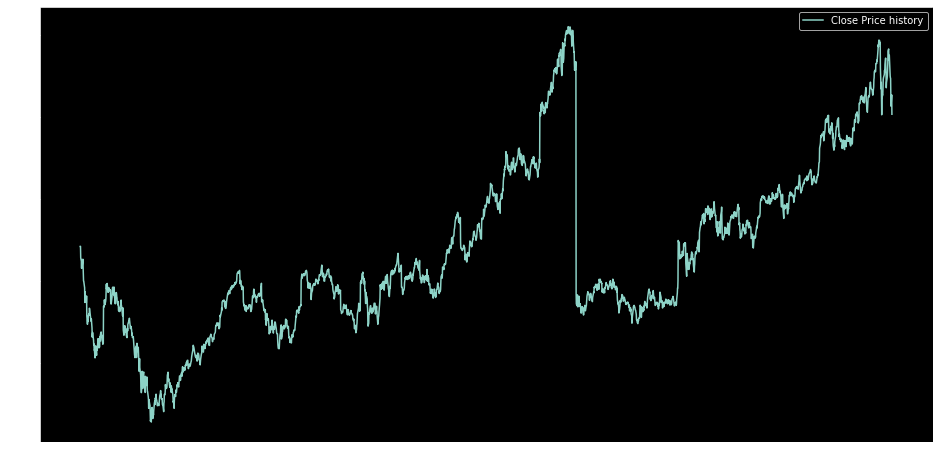

In [11]:
plt.figure(figsize=(16,8))
plt.plot(df['close'], label = 'Close Price history')
plt.legend()

In [12]:
#sort the dataset in ascending order
data = df.sort_index(ascending=True,axis=0)
data.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,...,adj_volume,year,month,day,day_of_year,week_of_year,day_of_week,day_of_week_name,quarter,mon_fri
date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,GOOGL,2008-01-02,692.87,697.37,677.7301,685.1900,8605100.0,0.0,1.0,347.507723,...,8605100.0,2008,1,2,2,1,2,Wednesday,1,0
2008-01-03,GOOGL,2008-01-03,685.26,686.85,676.5200,685.3300,6498400.0,0.0,1.0,343.690941,...,6498400.0,2008,1,3,3,1,3,Thursday,1,0
2008-01-04,GOOGL,2008-01-04,679.69,680.96,655.0000,657.0000,10708800.0,0.0,1.0,340.897317,...,10708800.0,2008,1,4,4,1,4,Friday,1,0
2008-01-07,GOOGL,2008-01-07,653.94,662.28,637.3500,649.2500,12793900.0,0.0,1.0,327.982450,...,12793900.0,2008,1,7,7,2,0,Monday,1,0
2008-01-08,GOOGL,2008-01-08,653.00,659.96,631.0000,631.6799,10667500.0,0.0,1.0,327.510995,...,10667500.0,2008,1,8,8,2,1,Tuesday,1,0


In [13]:
#Make a copy of the original dataset
new_data = data[['date','adj_close','adj_volume']]
new_data.head()

,date,adj_close,adj_volume
date,,,
2008-01-02,2008-01-02,343.655833,8605100.0
2008-01-03,2008-01-03,343.726049,6498400.0
2008-01-04,2008-01-04,329.517188,10708800.0
2008-01-07,2008-01-07,325.630189,12793900.0
2008-01-08,2008-01-08,316.817937,10667500.0
